# Cheat X_Ray Images (Pneumonia) Dataset Analysis using Tranfer Learning VGG16

#### Purpose and Meaning of Each Library/Import

- **numpy as np**:  
  Fundamental package for scientific computing with Python. Used for fast numerical operations, data manipulation, and managing arrays/matrices, which are central to deep learning.

- **tensorflow and keras**:  
  Core deep learning libraries for building and training neural networks.  
  - **tensorflow**: An end-to-end open-source platform for machine learning.  
  - **keras**: High-level API for building, training, and evaluating deep learning models.
  - **layers, Input, Model, Dense**:  
    - **layers**: Predefined layer types (Dense, Conv2D, Dropout, etc.) for neural networks.
    - **Input**: Specifies input shape for models.
    - **Model**: Defines the overall neural network architecture.

- **tensorflow.keras.preprocessing (image, ImageDataGenerator, preprocess_input)**:  
  Utilities for image preprocessing and on-the-fly data augmentation, particularly useful for computer vision tasks.
  - **ImageDataGenerator**: Automatically creates batches of image data with real-time augmentation for training/validation.
  - **preprocess_input**: Applies model-specific preprocessing to image data.

- **sklearn.model_selection.train_test_split**:  
  Efficiently splits data into training and testing (or validation) sets to objectively evaluate your models.

- **glob**:  
  Retrieves files/pathnames matching a specified pattern; commonly used to load image data.

#### Data Visualization

- **matplotlib.pyplot as plt**:  
  Popular plotting library for visualizing images, learning curves, or results.

- **seaborn as sns**:  
  Enhances matplotlib plots; useful for heatmaps, confusion matrices, and advanced data visualization.

#### Miscellaneous

- **warnings.filterwarnings("ignore")**:  
  Suppresses warning messages to keep notebook/script output clean and readable.

### Summary Table

| Library / Tool                           | Purpose / Use                                                                                 | Typical Meaning in Deep Learning                                  |
|-------------------------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------|
| `numpy as np`                            | Fast numerical computation, array/matrix operations                                          | Efficient math operations, data storage                           |
| `tensorflow`, `keras`                     | Building and training neural networks                                                        | Deep learning model development                                   |
| `layers`, `Input`, `Model`, `Dense`      | Define layers and architectures in neural networks                                           | Structure and connect layers in a model                           |
| `image`, `ImageDataGenerator`            | Image loading, preprocessing, augmentation                                                   | Handling and augmenting images for training                       |
| `preprocess_input`                       | Input normalization tailored to specific architectures (e.g., VGG, ResNet)                   | Ensures compatibility with pretrained models                      |
| `train_test_split` (from sklearn)        | Efficiently split data for objective evaluation                                              | Prevents overfitting, measures generalization                     |
| `glob`                                   | Fetch file paths matching pattern                                                            | Loads large numbers of images or files                            |
| `matplotlib.pyplot as plt`               | General-purpose visualization                                                                | Plot images/results/metrics                                       |
| `seaborn as sns`                         | Statistical data visualization                                                               | Advanced, publication-quality plots                               |
| `warnings.filterwarnings("ignore")`      | Suppress non-critical warnings                                                               | Keeps output readable, hides unnecessary warnings                  |

**In summary:**  
These libraries and utilities form the backbone of any advanced deep learning project, especially for image classification tasks! They help manage data, build/train models, and visualize results, all within a reproducible and practical code environment.

### Import the libraries

In [1]:
# Applying the Classification Libraries for deep learning:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model  # Use 'Input' instead of 'input'
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from glob import glob

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore the warnings:
import warnings
warnings.filterwarnings("ignore")

#### Chest X-Ray Pneumonia Image Dataset: Detailed Overview

The Chest X-Ray Pneumonia dataset is a benchmark medical imaging dataset used for classification tasks aimed at detecting pneumonia from chest radiographs. It contains X-ray images categorized primarily into **two classes**: *Normal* (healthy lungs) and *Pneumonia* (lungs affected by bacterial or viral pneumonia).

### Dataset Composition and Structure

- **Total Images:** Approximately **5,863** chest X-ray images  
- **Class Distribution:**  
  - *Pneumonia*: ~4,273 images  
  - *Normal*: ~1,583 images  
- **Data Splits:**  
  - **Training set:** ~5,216 images  
  - **Test set:** ~624 images  
  - **Validation set:** ~16 images (varies in some versions)  
- The dataset images are organized into folders corresponding to class labels (`PNEUMONIA` and `NORMAL`), commonly structured as train/test/validation subsets to facilitate model development and evaluation.

#### Image Characteristics

- The images are grayscale frontal chest radiographs (X-rays).
- Resolution varies across images but they are typically resized (e.g., 224x224 pixels) for modeling purposes.
- The images show distinct visual differences between normal and pneumonia-affected lungs; bacterial pneumonia often presents as areas of increased opacity on the X-ray.

#### Usage and Significance

- This dataset serves as a primary resource in developing computer vision models, especially convolutional neural networks (CNNs), for automatic and early detection of pneumonia—a critical respiratory illness.
- It has been utilized in multiple studies to benchmark pneumonia detection performance, including those using state-of-the-art deep learning architectures like VGG, ResNet, DenseNet, and custom CNN models.
- Models trained on this dataset have achieved high accuracy levels (~90-94%) for classifying pneumonia vs. normal cases.

#### Public Availability and Citation

- The dataset is publicly available and hosted on platforms such as [Kaggle Chest X-Ray Pneumonia dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).
- Users are encouraged to cite the original publication by Kermany et al. (2018):

  > *Kermany, D. S., Goldbaum, M., Cai, W., Valentim, C. C. S., Liang, H., Baxter, S. L., ... & Zhang, K. (2018). Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell, 172(5), 1122-1131.e9.*

### Summary Table of Dataset

| Feature               | Description                                         |
|-----------------------|-----------------------------------------------------|
| Dataset Name          | Chest X-Ray Pneumonia Images                         |
| Number of Images      | ~5,863                                               |
| Classes               | 2 (Pneumonia, Normal)                               |
| Image Type            | Frontal Chest X-Ray Radiographs                      |
| Image Format          | JPEG (commonly)                                     |
| Resolution            | Variable, typically resized to 224x224 or similar  |
| Data Split            | ~5,216 train, ~624 test, validation varies         |
| Usage                 | Pneumonia detection/classification tasks            |
| Public Access         | Available on Kaggle and other medical data portals |
| License & Citation    | CC BY 4.0; Kermany et al., Cell 2018                |

This dataset has become a gold standard in the medical imaging and AI community for pneumonia diagnosis and continues to support research in automated disease detection.



In [2]:
IMAGE_SIZE = [224, 224]  # VGG16 requires 224x224 images

# Load the dataset
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [21]:
import os

# Get class subdirectories (e.g. NORMAL, PNEUMONIA)
classes = os.listdir(train_path)
print(f"Classes found: {classes}")

Classes found: ['NORMAL', 'PNEUMONIA']


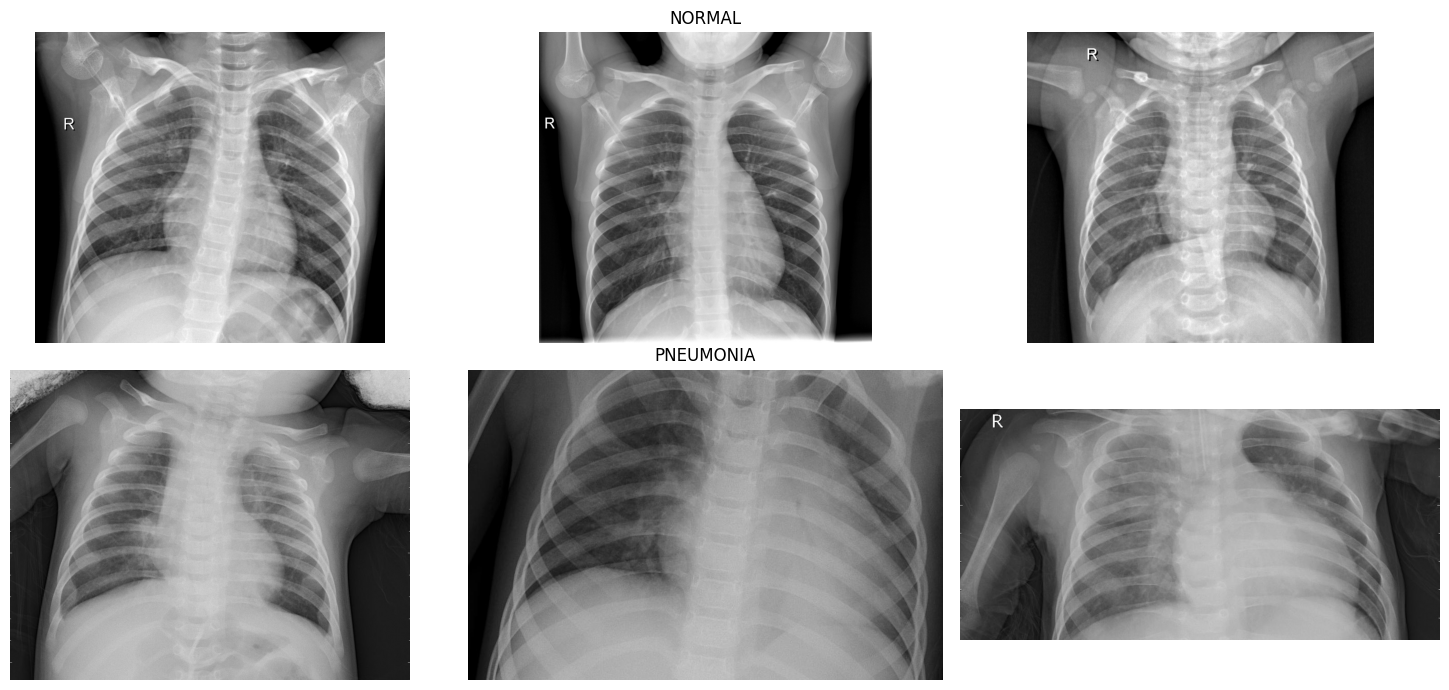

In [ ]:
def plot_sample_images(path, classes, samples_per_class=3):
    plt.figure(figsize=(15, 7))
    
    for i, cls in enumerate(classes):
        cls_folder = os.path.join(path, cls)
        images = os.listdir(cls_folder)
        
        # Randomly sample images from the class folder
        sample_images = random.sample(images, samples_per_class)
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(cls_folder, img_name)
            img = mpimg.imread(img_path)
            
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 1:
                plt.title(cls)  # Show the class label only once per row

    plt.tight_layout()
    plt.show()

# Plot sample images from training dataset
plot_sample_images(train_path, classes)


### Apply the Transfer Learning Modeling

In [3]:
# Import vgg16 from keras applications
from tensorflow.keras.applications import VGG16
# Import the VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False  # Freeze the layers

In [5]:
# Import the dataset using glob:
folder = glob('chest_xray/train/*')

In [6]:
from tensorflow.keras.layers import Flatten

x = Flatten()(vgg.output)
prediction = Dense(len(folder), activation='softmax')(x)

In [7]:
# Create the model object:
model = Model(inputs=vgg.input, outputs=prediction)



#### Purpose and Meaning of the Model Summary:

#### Purpose:
- **Provides an overview of the layers, output shapes, and number of trainable parameters** in the model.
- Allows practitioners to understand the **model architecture**, **capacity**, and **complexity** before training or inference.
- Helps **debug**, **optimize**, and **report** neural network structure.

#### Meaning:
- Each row corresponds to a **layer or operation** in the neural network:
  - **Layer (type)**: Defines the kind of operation (e.g., Conv2D, MaxPooling2D, Dense).
  - **Output Shape**: The shape of the data tensor leaving the layer.
  - **Param #**: Number of trainable parameters in the layer (weights + biases).
- The network processes images in stages, successively extracting hierarchical features.

#### Detailed Explanation of Key Components:

#### Input Layer:
- `(None, 224, 224, 3)` indicates the input tensor shape:
  - **None** means batch size can vary.
  - `224x224` is the spatial dimension (height x width).
  - `3` is the number of color channels (RGB).

#### Convolutional Layers (Conv2D):
- Filters slide over the input image, performing convolution operations.
- Extract spatial features (edges, textures, patterns):
  
  $$
  \text{Output}_{i,j,k} = \sum_{m,n} \text{Input}_{(i+m),(j+n),:} \cdot \text{Kernel}_{m,n,k} + b_k
  $$
  
  Here, kernels (or filters) learn to detect features in the image.
- Each Conv layer has learnable parameters: weights (filters) + biases.

#### MaxPooling Layers:
- Reduce spatial dimensions by taking the maximum value in windows (usually 2x2).
- Helps reduce computation, controls overfitting, and builds translational invariance.

#### Flatten Layer:
- Converts 3D feature maps into 1D vector:

  $$
  \text{Flattened Vector} = [x_1, x_2, ..., x_{25088}]
  $$

- Prepares tensor for fully connected (Dense) layers.

#### Dense (Fully Connected) Layers:
- Standard neural network layers connecting every input to every output neuron.
- Final Dense layer outputs classification logits, here with 2 units for binary classes.

#### Mathematics Behind the Model Components:

- **Convolution Operation (Conv2D layers):**

  Feature extraction by sliding filter $$ W $$ across input $$ I $$:

  $$
  (I * W)[i, j] = \sum_m \sum_n I[i + m, j + n] \cdot W[m,n]
  $$

- **Activation Function (ReLU, typically applied after Conv2D):**

  $$
  \text{ReLU}(x) = \max(0, x)
  $$

  Introduces non-linearity for learning complex patterns.

- **Pooling (MaxPooling):**

  Reduces spatial size, summarizing activations:

  $$
  P(i, j) = \max_{\substack{m=0,...,k-1 \\ n=0,...,k-1}} X(i \cdot s + m, j \cdot s + n)
  $$

  where $$ k $$ is pooling window size, $$ s $$ is stride.

- **Fully Connected Layer:**

  Compute weighted sums and bias:

  $$
  z_j = \sum_i x_i w_{ij} + b_j
  $$

  Followed by activation (softmax for classification).

#### Summary Table of the Model Architecture

| Layer Type           | Output Shape                  | No. of Parameters | Purpose / Role                              |
|----------------------|------------------------------|-------------------|--------------------------------------------|
| **InputLayer**       | (None, 224, 224, 3)          | 0                 | Accepts 224x224 RGB images                  |
| **Conv2D Layers**    | Gradually reduce spatial size, increase depth | Varies            | Extract local patterns / features          |
| **MaxPooling2D**     | Reduce spatial dimensions    | 0                 | Downsampling, controls overfitting         |
| **Flatten**          | (None, 25088)                | 0                 | Prepare tensor for dense layers             |
| **Dense (Output)**   | (None, 2)                    | 50,178            | Classify pneumonia vs normal (2 classes)  |

#### Professional Detail:

The VGG16 architecture shown consists of 13 convolutional layers organized in 5 blocks, interspersed with max pooling layers that halve the image dimensions after each block. The convolutional filters increase in count as depth increases—starting from 64 and doubling at each block to learn increasingly complex and abstract visual features.

After convolutional processing, the 3D feature maps are flattened into a 1D vector of length 25,088 before being fed into the fully connected dense output layer with two neurons, which produce logits corresponding to the probability of each class (normal or pneumonia).

This architecture’s strength lies in its simplicity, depth, and consistent small convolution kernels (3x3). It has demonstrated strong representational capabilities in image recognition tasks, including medical imaging such as pneumonia detection.



In [8]:
# Generate the Summary:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Compile the model:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Train the dataset generator:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 5216 images belonging to 2 classes.


In [13]:
# Test the dataset generator:
test_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical' 
)

Found 624 images belonging to 2 classes.


In [14]:
# Fit the model:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),                                                                          
    validation_steps=len(test_generator)
)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 3948s 24s/step - accuracy: 0.8444 - loss: 0.3973 - val_accuracy: 0.8878 - val_loss: 0.3303
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 3826s 23s/step - accuracy: 0.9574 - loss: 0.1246 - val_accuracy: 0.9231 - val_loss: 0.2487
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 4067s 25s/step - accuracy: 0.9649 - loss: 0.0899 - val_accuracy: 0.9038 - val_loss: 0.3154
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 4282s 26s/step - accuracy: 0.9690 - loss: 0.0790 - val_accuracy: 0.8093 - val_loss: 0.6050
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 3837s 24s/step - accuracy: 0.9674 - loss: 0.0895 - val_accuracy: 0.8734 - val_loss: 0.5072


In [15]:
# Save the model with the highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
model.save('model_vgg19.h5')

print(f"Best model saved after epoch: {best_epoch + 1} with validation accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")

Best model saved after epoch: 2 with validation accuracy: 0.9231


#### Purpose and Meaning

**Purpose of the code:**  
To visualize how well a deep learning model is training and generalizing by plotting accuracy and loss for both training and validation sets over each epoch.

**What the code does:**
- Creates a figure with two subplots:
  1. **Accuracy Plot:**  
     - Plots training and validation accuracy vs. epochs.
     - Helps you see if the model is learning and whether it’s overfitting or underfitting.
  2. **Loss Plot:**  
     - Plots training and validation loss vs. epochs.
     - Shows how the model’s prediction error is reducing (or potentially increasing, indicating issues like overfitting).
- Both plots use the data in the `history` object returned by `model.fit()` in Keras, which records the performance each epoch.

#### Key Meanings

- **Training Accuracy/Loss:** How well the model is performing on the training data.
- **Validation Accuracy/Loss:** How well the model is performing on unseen validation data (measures generalization).
- **Epoch:** One complete pass through the full training dataset.
- **Overfitting:** If validation loss grows while training loss drops, the model may be memorizing data instead of learning to generalize.

#### Summary Table

| Plot/Metric       | What it Shows                                   | Why it’s Useful                         | How to Interpret                                       |
|-------------------|-------------------------------------------------|-----------------------------------------|--------------------------------------------------------|
| Training Accuracy | Accuracy on training data per epoch              | Tracks model’s learning progress        | Should increase, but beware if it’s much > validation  |
| Validation Accuracy | Accuracy on unseen validation data             | Tracks generalization to new data       | Should also increase; stagnation/drop may signal overfit|
| Training Loss     | Error on training set per epoch                  | Should decrease as model learns         | Won’t reach zero, but steep drops are expected initially|
| Validation Loss   | Error on validation set per epoch                | Measures overfitting/generalization     | Rising loss may show overfitting; similar to training is ideal|

**Summary:**  
Plotting training and validation accuracy/loss helps you monitor and diagnose your model’s learning process in real time. This visualization is an essential best practice to ensure your deep learning model is training as intended, not overfitting, and generalizing well to new data.

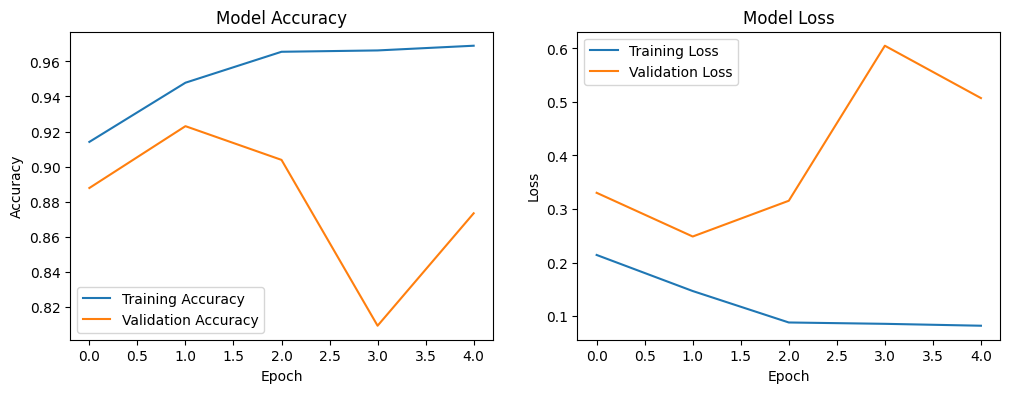

In [16]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()



#### Purpose and Meaning

**Purpose of the code:**  
To evaluate and visualize the performance of a binary classification model by plotting the Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) metric.

**What the code does step-by-step:**

1. **Retrieve true labels and model predictions:**  
   - `Y_true = test_generator.classes`: Gets the true class labels from the test data generator.  
   - `Y_pred = model.predict(test_generator)`: Generates predicted probabilities for each class from the trained model.

2. **Determine the number of classes:**  
   - Finds the total number of classes in the dataset.

3. **Binarize output labels:**  
   - The true labels and the predicted class indices are converted into a one-hot (binary) format using `label_binarize()`, which is needed for ROC calculation in multi-class/binary settings.

4. **Calculate ROC curve and AUC:**  
   - Computes the False Positive Rate (FPR) and True Positive Rate (TPR) across varying decision thresholds using `roc_curve()`.  
   - Calculates the area under the ROC curve with `auc()`, which summarizes the model’s ability to discriminate between classes.

5. **Plot the ROC curve:**  
   - Plots TPR vs FPR with a diagonal reference line indicating random classification performance.  
   - The curve shows the trade-off between sensitivity (recall) and specificity for different threshold settings.  
   - The closer the ROC curve bends towards the top-left corner, the better the model.

#### Summary Table

| Term                     | Meaning                                         | Role in Model Evaluation                            |
|--------------------------|-------------------------------------------------|----------------------------------------------------|
| **True Labels (Y_true)** | Actual classes of test samples                   | Ground truth for evaluation                          |
| **Predicted Probabilities (Y_pred)** | Model’s output probabilities per class               | Used to derive predicted labels at varying thresholds |
| **Binarization**         | Conversion of labels to one-hot format           | Essential for ROC calculation in binary/multi-class |
| **False Positive Rate (FPR)** | Proportion of negatives incorrectly classified as positive | X-axis of ROC curve; measures false alarms           |
| **True Positive Rate (TPR)**  | Proportion of positives correctly identified         | Y-axis of ROC curve; also called Recall or Sensitivity |
| **ROC Curve**            | Plot of TPR vs FPR at varying classification thresholds | Visualizes classifier performance                    |
| **Area Under Curve (AUC)** | Scalar metric summarizing overall classifier ability | Higher AUC means better discrimination                |
| **Reference Line**       | Diagonal line indicating random guessing          | Baseline to compare model against                      |

#### Why ROC & AUC Are Important

- **ROC curve** shows how the classifier’s true positive rate changes with the false positive rate as you vary the classification threshold.  
- **AUC** is threshold-independent and provides a single number to quantify the overall ability of a model to separate positive and negative classes.  
- AUC closer to 1 means excellent performance; near 0.5 means no better than random guessing.

This visualization and metric are essential for understanding and comparing binary classification models, especially when class distributions or costs of false positives/negatives vary.


20/20 ━━━━━━━━━━━━━━━━━━━━ 400s 20s/step


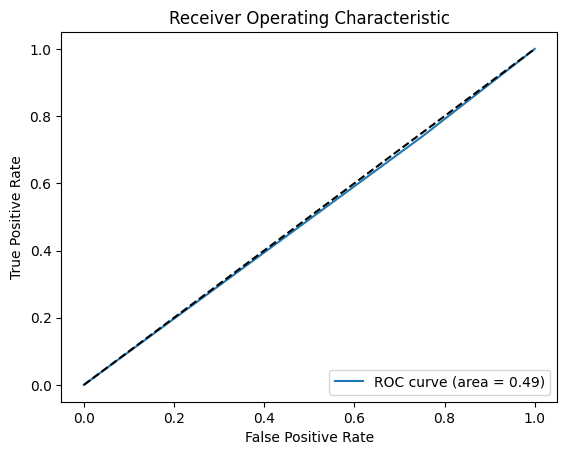

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get the true labels and predicted probabilities
Y_true = test_generator.classes
Y_pred = model.predict(test_generator)

# Check the number of classes
num_classes = len(test_generator.class_indices)

# Binarize the output
Y_true_bin = label_binarize(Y_true, classes=[0, 1])  # Adjust for binary classification
Y_pred_bin = label_binarize(np.argmax(Y_pred, axis=1), classes=[0, 1])

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_true_bin[:, 0], Y_pred_bin[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Purpose and Meaning

**Purpose:**  
To display a small random sample of images from the validation dataset along with their class labels. This helps in visually verifying the data to understand the variety, quality, and class distribution of images in the dataset.

**What happens in the code:**

1. **Load image file paths:**  
   - `val_images = glob(valid_path + '/*/*')`  
   Collects all image file paths from subdirectories under the validation folder. Usually, each subfolder corresponds to a separate class label.

2. **Randomly sample images:**  
   - `sample_images = random.sample(val_images, 5)`  
   Selects 5 random images from the validation set to display.

3. **Plot images:**  
   - Creates a figure large enough to fit 5 images in one row.  
   - For each sampled image:
     - Reads the image using `mpimg.imread()`.
     - Displays the image without axes using `plt.axis('off')`.
     - Sets the title as the class label, extracted from the folder name in the image path.

4. **Display the images:**  
   - Calls `plt.show()` to render the plot.

#### Summary Table

| Code Component          | Purpose                                       | Details & Importance                              |
|-------------------------|-----------------------------------------------|--------------------------------------------------|
| `glob(valid_path + '/*/*')` | Retrieve all image file paths recursively    | Loads image paths grouped by class directories   |
| `random.sample(val_images, 5)` | Randomly select few images to display        | Ensures variety and randomness in sample          |
| `mpimg.imread(img_path)` | Read image data from file                       | Converts image file into an array for plotting   |
| `plt.figure(figsize=(15,10))` | Set the canvas size                          | Makes images large enough for clear visualization |
| `plt.subplot(1, 5, i+1)` | Create individual subplot for each image       | Organizes multiple images horizontally            |
| `plt.imshow(img)`         | Show image array                                | Renders the image visually                         |
| `plt.axis('off')`         | Hide axes and ticks                             | Cleaner visualization without clutter             |
| `plt.title(img_path.split('/')[-2])` | Display class label from path            | Shows true class for visual verification          |
| `plt.show()`              | Render the full image plot                       | Displays the final visualization                   |

**In essence:**  
This snippet offers a quick visual sanity check for your image dataset, allowing you to confirm that labels and images align correctly and to get intuitive insight into the data diversity and challenges before training a model.



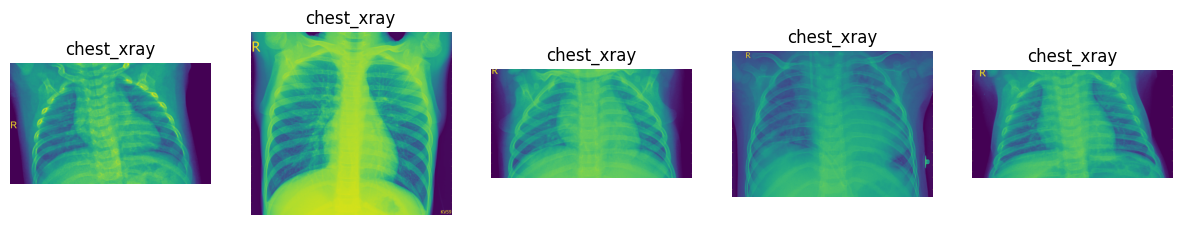

In [18]:
import random
import matplotlib.image as mpimg

# Visualize random images from the validation dataset
val_images = glob(valid_path + '/*/*')  # Get all images in the validation set
sample_images = random.sample(val_images, 5)  # Randomly sample 5 images

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_path.split('/')[-2])  # Show the class label
plt.show()

#### Purpose and Meaning

**Purpose:**  
To load a saved deep learning model (here, a VGG19-based classifier) and use it to predict the class of a single input image, then output the predicted class label.

**Step-by-step Meaning:**

1. **Load the model:**  
   - `load_model('model_vgg19.h5')` loads a saved Keras model, which can be used for prediction.  
   This model was trained to classify chest X-ray images into classes like 'NORMAL' and 'PNEUMONIA'.

2. **Load and preprocess the image:**  
   - The image at the specified path is loaded and resized to the input size expected by the model (224x224 pixels).  
   - Converted to an array and expanded along batch dimension (batch size = 1).  
   - Preprocessing (`preprocess_input`) scales pixel values into the format the VGG models expect.

3. **Make predictions:**  
   - The model outputs a probability distribution over classes for the input image.

4. **Get predicted class:**  
   - `np.argmax` finds the class index with the highest predicted probability.

5. **Interpret predicted class index into label:**  
   - The index is mapped to a human-readable label such as 'NORMAL' or 'PNEUMONIA'.

6. **Print predicted class index and label.**

#### Summary Table

| Code Segment             | Purpose                                              | Explanation/Use                                                                                 |
|--------------------------|------------------------------------------------------|------------------------------------------------------------------------------------------------|
| `load_model('model_vgg19.h5')` | Load pre-trained and saved model                   | Enables re-using trained model without re-training                                              |
| `image.load_img(img_path, target_size=(224, 224))` | Load and resize input image                           | Converts image to a standardized size expected by the model                                    |
| `image.img_to_array(img)`           | Convert image to numeric array                         | Necessary for processing by the neural network                                                |
| `np.expand_dims(..., axis=0)`     | Add batch dimension                                   | Keras models expect batch input shape (batch_size, height, width, channels)                    |
| `preprocess_input(img_array)`     | Apply model-specific preprocessing                    | Normalizes input pixel values to match model training conditions                               |
| `model.predict(img_array)`         | Generate class probabilities                          | Forward pass through network to get prediction vector                                         |
| `np.argmax(predictions, axis=1)`  | Extract class with highest predicted probability      | Simplest decision rule to convert probabilities to class prediction                            |
| `class_labels = {0: 'NORMAL', 1: 'PNEUMONIA'}`  | Map predicted index to human-readable label            | Makes prediction interpretable                                                                |
| `print(predicted_label)`            | Output predicted label                                | Provides final result of classification                                                      |

This code pattern is a standard workflow in practical deep learning applications where a trained model is used to classify new unseen images with human-friendly output labels.


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('model_vgg19.h5')

# Load and preprocess the image
img_path = 'chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'  # Adjust path as needed
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess the image

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class index:", predicted_class)

# Map the predicted class index to the class name
class_labels = {0: 'NORMAL', 1: 'PNEUMONIA'}  # Adjust according to your dataset
predicted_label = class_labels.get(predicted_class[0], "Unknown")
print("Predicted class label:", predicted_label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class index: [0]
Predicted class label: NORMAL


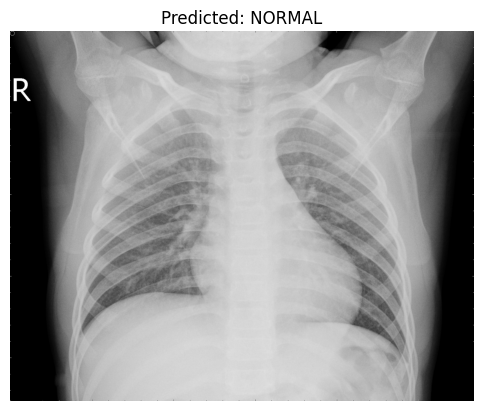

In [20]:
# Visualize the input image
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()